



















# RAPPORT ARF
### de Toldi Melchior, de Bézenac Emmanuel

## Introduction

Nous aborderons dans ce rapport différents modèles de classification binaire supervisés appliqués sur des données générées artificiellement, et discuterons de leurs résultats. 
   
Nous traiterons les modèles suivants:
* Naive Bayes
* Arbres de décision
* K-nearest neighbors
* Perceptron
* Réseau de neurones

Pour finir, nous appliquerons ces modèles sur un cas d'usage pour tenter de prédire les survivants du naufrage du Titanic.

## Données Artificielles:

   Afin d'observer le comportement des modèles au cours de la phase d'apprentissage et de prédiction, nous avons souhaité utiliser des données bidimensionnelles générés artificiellement. De cette manière, nous pouvons interpréter facilement les résultats, et voir comment se comportent les modèles dans des situations différentes (données linéairement séparables, ou non, par exemple).

   En pratique, la dimension des données est supérieure à 2, mais nous pouvons néenmoins tenter d'inférer certains spécificités de fonctionnement des modèles sur ces données analogues avec une dimension supérieure.
   
### Chargement et Affichage>

In [4]:
import arftools as arf
import numpy as np
import models
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


#### Mélange de 2 gaussiennes

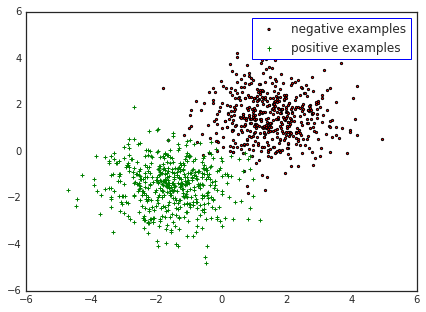

In [92]:
x_twogauss,y_twogauss=arf.load_csv('two_gaussians')
arf.plot_data(x_twogauss,y_twogauss)

#### Mélange de 4 gaussiennes

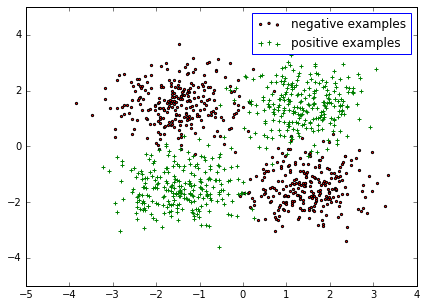

In [2]:
x_fourgauss,y_fourgauss=arf.load_csv('four_gaussians')
arf.plot_data(x_fourgauss,y_fourgauss)

#### Frontière hyperbolique

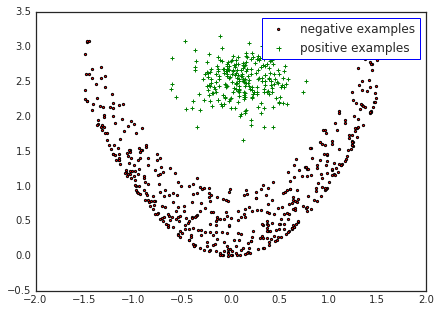

In [94]:
x_hyp,y_hyp=arf.load_csv('hyperbolic2')
arf.plot_data(x_hyp,y_hyp)

#### Frontière concentrique

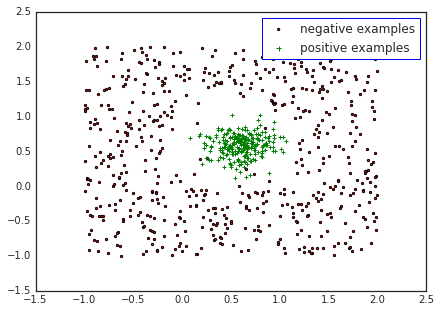

In [95]:
x_conc,y_conc=arf.load_csv('concentric2')
arf.plot_data(x_conc,y_conc)

#### Échequier

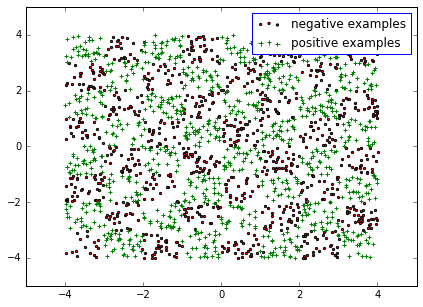

In [8]:
x_ech,y_ech=arf.load_csv('echequier')
arf.plot_data(x_ech,y_ech)

# Résultats/Interprétation

## Arbres de décision

In [4]:
dt=models.DecisionTree()
dt.max_depth=6

### Two Gaussians

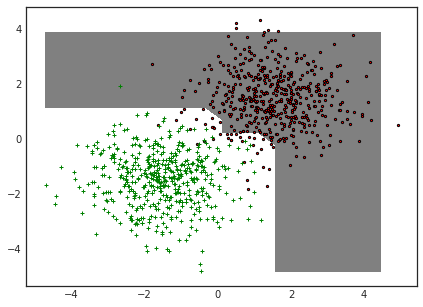

In [198]:
dt.fit(x_twogauss,y_twogauss)
dt.to_pdf('decisiontree')
arf.plot_data2(x_twogauss,y_twogauss,f=dt.predict)

Voici l'affichage de l'arbre de décision de profondeur 3 entrainé sur les données ci-dessus.

<img src="images/decisiontree.png" style="width: 700px; float:left"/>

### Four Gaussians

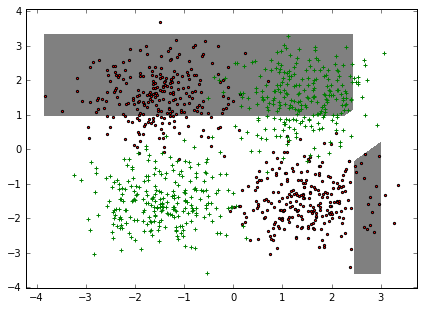

In [6]:
dt.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=dt.predict)

Ici (comme pour l'échéquier plus bas) l'algorithme n'est pas très efficace, cela est du au fait qu'on ne peux pas, contrairerement aux autres set de données, tracer une unique frontière continue.

### Frontière hyperbolique

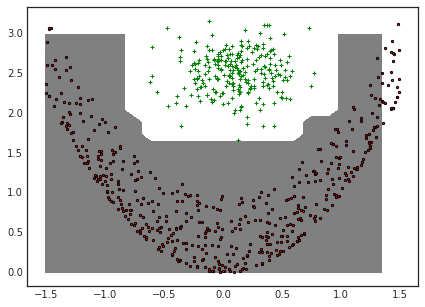

In [100]:
dt.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=dt.predict)

### Frontière concentrique


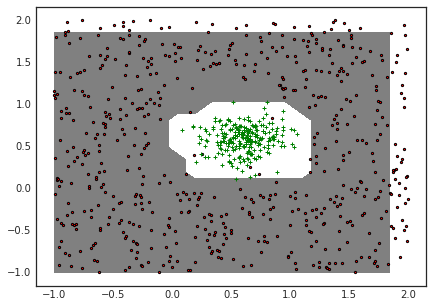

In [101]:
dt.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=dt.predict)

Voici un graphique du score obtenu sur les données ci-dessus pour l'arbre de décision en fonction de sa profondeur. Mesuré avec une cross-validation des données, avec n=8.

<img src="images/dectree_plot6_conc.png" style="width: 600px; float:left"/>

### Echequier

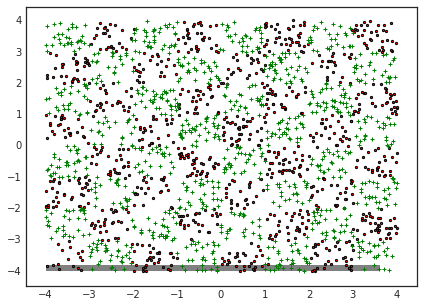

In [102]:
dt.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=dt.predict)

Voici un graphique du score obtenu sur les données ci-dessus pour l'arbre de décision en fonction de sa profondeur. Mesuré avec une cross-validation des données, avec n=8.

<img src="images/dectree_plot5_ech.png" style="width: 600px;float:left"/>

Le score ne semble pas s'améliorer lorsque la profondeur augmente. Une des raisons pour celui-ci pourrait être le fait que l'algorithme cherche la droite $x1=c$, ou $x2=c, c \in \mathbb{R} $ qui sépare au mieux les données (au sens de l'entropie), puis attribue un label aux points $x \in X$ en fonction de leur appartenance aux deux sous-espaces produits, et ceci récursivement.

Cet algorithme est glouton et naïf, puisqu'il qu'un moment où il évalue la séparation d'espace à faire, il ne tient pas compte de la séparation que va faire le noeud fils.

## Naive Bayes

In [103]:
bayes=models.Bayes()

### Two Gaussians

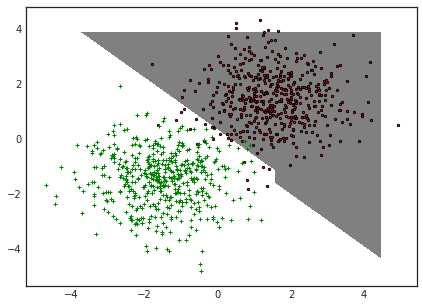

In [104]:
y_twogauss = models.mod_labels(y_twogauss,'0,1')  #classif -1,1 -> 0,1
bayes.fit(x_twogauss,y_twogauss)
arf.plot_data2(x_twogauss,y_twogauss,f=bayes.predict)

### Four Gaussians

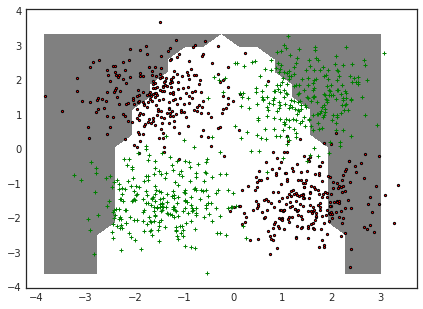

In [105]:
y_fourgauss = models.mod_labels(y_fourgauss,'0,1')
bayes.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=bayes.predict)

### Frontière hyperbolique

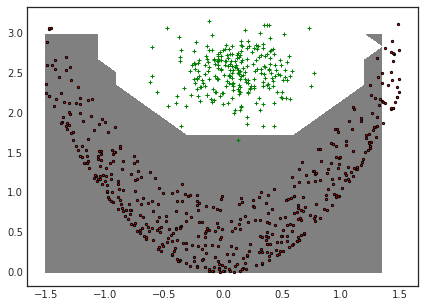

In [106]:
y_hyp = models.mod_labels(y_hyp,'0,1')
bayes.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=bayes.predict)

### Frontière concentrique


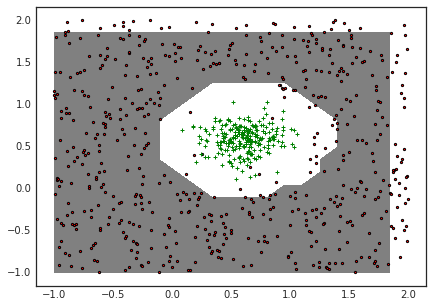

In [107]:
y_conc = models.mod_labels(y_conc,'0,1')
bayes.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=bayes.predict)

Le naive Bayes performe très bien sur les données hyperbolique et concentrique, il a cependant beaucoup plus de difficultés sur le mélange de 4 gaussiennne ainsi que sur l'échéquier.


### Echequier

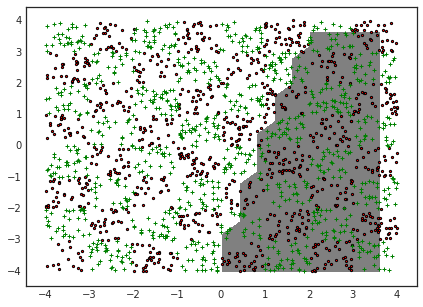

In [108]:
y_ech = models.mod_labels(y_ech,'0,1')
bayes.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=bayes.predict)

## K-nearest neighbors

In [109]:
knn=models.KNN(k=3) #Vote parmi les 3 plus proches voisins

### Two Gaussians

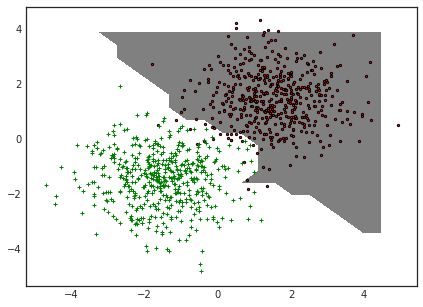

In [110]:
knn.fit(x_twogauss,y_twogauss)
arf.plot_data2(x_twogauss,y_twogauss,f=knn.predict)

### Four Gaussians

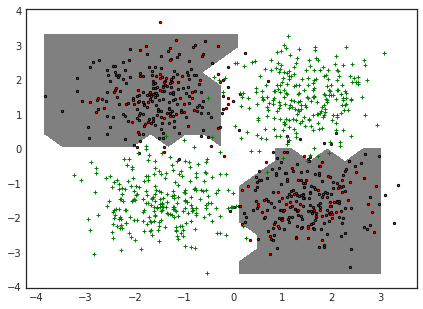

In [111]:
knn.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=knn.predict)

<img src="images/knn_plot4_fourgauss.png" alt="Drawing" style="width: 600px;float:left"/>

Nous pouvons observer que lorsque nous faisons varier le nombre de voisins k pris en compte dans le vote, le score n'augmente que très peu.


### Frontière hyperbolique

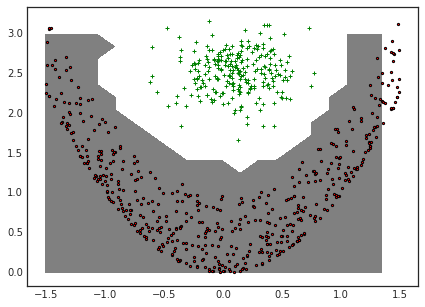

In [112]:
knn.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=knn.predict)

### Frontière concentrique


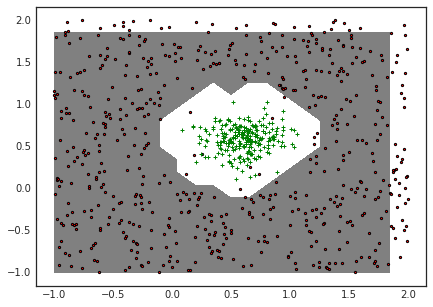

In [113]:
knn.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=knn.predict)

### Echequier

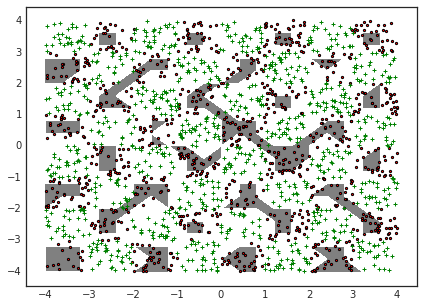

In [114]:
knn.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=knn.predict)

Dans ce cas précis, lorsque nous augmentons le nombre de voisins k pris en compte dans le vote, le score baisse faiblement. Lorsque les données positives et négatives sont réparties de manière relativement uniforme dans l'espace, il peut être intéressant de prendre un k plus faible.


<img src="images/knn_plot4_ech.png" alt="Drawing" style="width: 600px;float:left"/>


Voici la frontière de décision lorsque k=100.

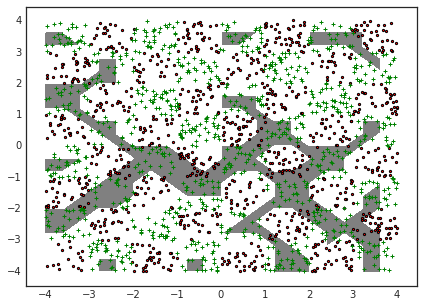

In [115]:
knn=models.KNN(k=100)

knn.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=knn.predict)

Nous voyons bien ici qu'il est moins performant car les plus proches voisins sont positifs et négatifs, en effet il y à moins de 100 points par "case" de l'échéquier.

## Perceptron

In [21]:
perc=models.Perceptron()

### Two Gaussians

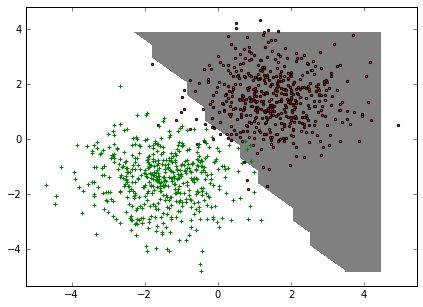

In [22]:
perc.fit(x_twogauss,y_twogauss)
arf.plot_data2(x_twogauss,y_twogauss,f=perc.predict)

### Four Gaussians

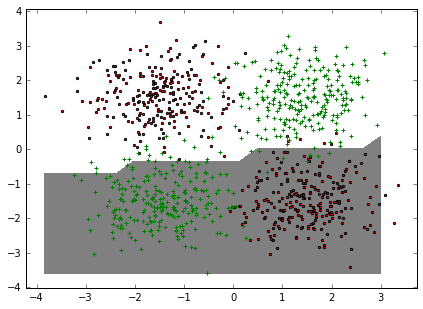

In [23]:
perc.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=perc.predict)

**Note**: Comme le perceptron sépare linéairement l'espace en deux, nous pouvons bien évidemment nous douter que ce classifieur n'aura de très bons résultats sur des données avec des classes qui ne sont pas eux même séparables linéairement. Néenmoins, nous pouvons corriger ce problème en modifiant les données elles-mêmes, en appliquant des transformations sur ces dernières pour que le perceptron puisse les séparer.

#### Exemple:

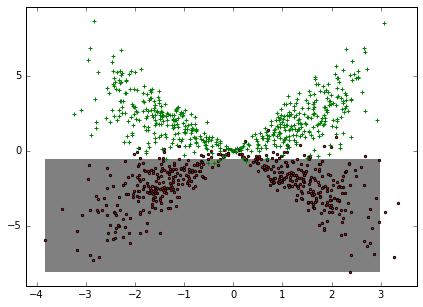

In [31]:
x_fourgauss2=np.copy(x_fourgauss)
x_fourgauss2[:,1]=x_fourgauss[:,1]*x_fourgauss[:,0]
perc.fit(x_fourgauss2,y_fourgauss)
arf.plot_data2(x_fourgauss2,y_fourgauss,f=perc.predict)

Ici, nous avons appliqué la transformation $f:\mathbb{R}^2 \to \mathbb{R}^2$ telle que $f(x1,x2)=(x1,x1*x2)$ à tout les points de $X$. De cette manière,   
$f(x1,x2)$ est 
$$\begin{cases}>0 & \quad \text{si } (x1>0 \text{ et } x2>0) \text{ ou } (x1<0 \text{ et } x2<0)\\ <0  & \quad \text{sinon}\\ \end{cases}$$


**Remarque**: Appliquer ces transformations sur les données requiert d'avoir de l'information sur sa distribution sous-jacente. Lorsque que l'on sort de l'espace bi ou tri-dimensionnel il est bien plus difficile de choisir la transformation $f$ à appliquer aux données.



### Frontière hyperbolique

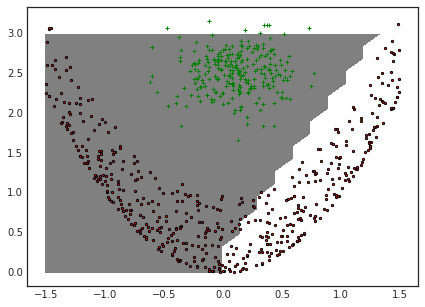

In [193]:
perc.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=perc.predict)

Nous savons ces données non séparables linéairement, mais dans le cas ou nous faisions une transformation hyperbolique de l'espace, ces dernières pourraient très bien le devenir, et nous pourrons donc espérer avoir de meilleurs résultats...

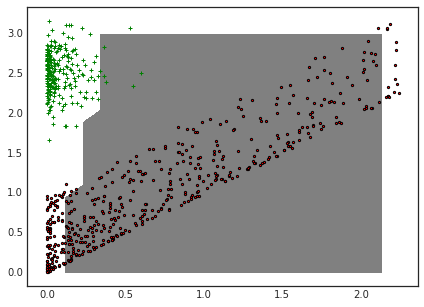

In [196]:
x_hyp2=np.copy(x_hyp)
x_hyp2[:,0]=x_hyp[:,0]*x_hyp[:,0]
perc.fit(x_hyp2,y_hyp)
arf.plot_data2(x_hyp2,y_hyp,f=perc.predict)

### Frontière concentrique


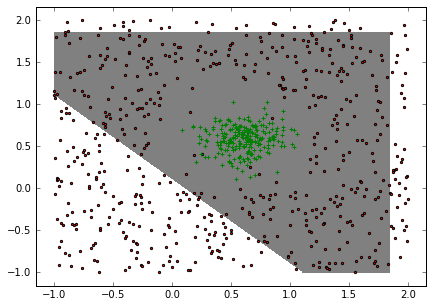

In [27]:
perc.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=perc.predict)

Ces deux classes semblent être difficile à séparer. Avec $f$ tel que $f(x1, x2) = (x1 , (x1-0.5)^2+(x2-0.8)^2 )$, on peut néenmoins avoir une séparation bien plus intéressante.

**Intuition**: Les labels positifs semblent être proches du point (0.5,0.8).

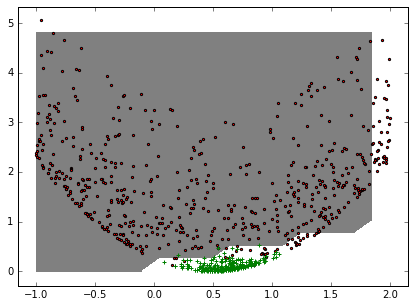

In [32]:
x_conc2=np.copy(x_conc)
x_conc2[:,1]=(x_conc[:,0]-0.5)*(x_conc[:,0]-0.5)+(x_conc[:,1]-0.8)*(x_conc[:,1]-0.8)
perc.fit(x_conc2,y_conc)
arf.plot_data2(x_conc2,y_conc,f=perc.predict)

### Echequier

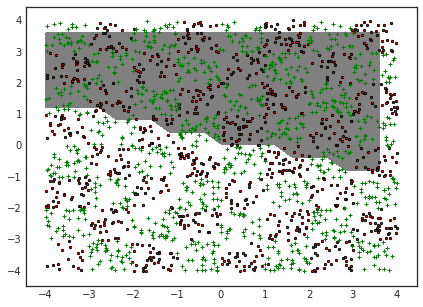

In [116]:
perc.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=perc.predict)

**Remarque**: A moins de trouver une fonction qui colle parfaitement aux données, le perceptron ne semble pas être un modèle approprié. Il nous faut un modèle à la fois plus expressif (plusieurs droites séparatrices?), et qui puisse trouver lui-même des transformations qui pourront séparer les deux classes. L'usage d'un réseau de neurones multi-couche semble plus adéquat.

## Réseau de neurones

Nous avons choisi de confronter nos résultats avec un réseau de neurones multicouches, le nombre de couches cachées, et de neurones par couches cachées étant entierement paramétrisable par l'utilisateur.

La fonction d'activation est une sigmoïde, pour le coût nous avons fait très simple, une simple différence.

Nous avons choisis (assez arbitrairement) 2 couches cachées de 10 neurones chacunes. Cela donne d'excelentes performances sauf pour l'échéquier ou il faudrait pouvoir séparer les 8\*8 = 64 zones ce qui n'est pas possible avec une frontière polynomiale.

In [22]:
nn=models.NN(layers=[2,10,10,1],eps=0.1,max_iter=100000)

### Two Gaussians

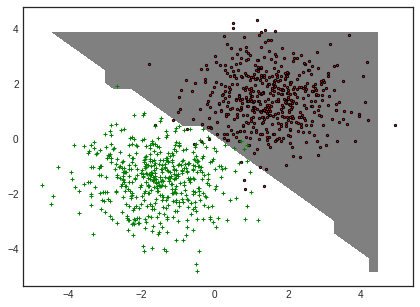

In [23]:
y_twogauss = models.mod_labels(y_twogauss,'-1,1')
nn.fit(x_twogauss,y_twogauss)
arf.plot_data2(x_twogauss,y_twogauss,f=nn.predict)

### Four Gaussians

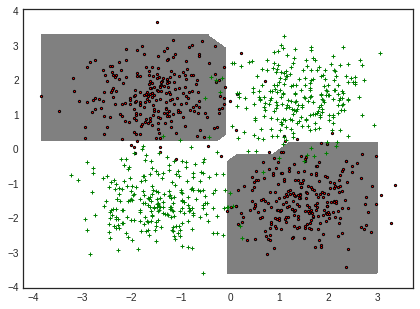

In [24]:
y_fourgauss = models.mod_labels(y_fourgauss,'-1,1')
nn.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=nn.predict)

### Frontière hyperbolique

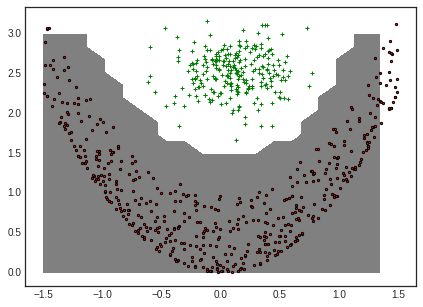

In [25]:
y_hyp = models.mod_labels(y_hyp,'-1,1')
nn.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=nn.predict)

### Frontière concentrique


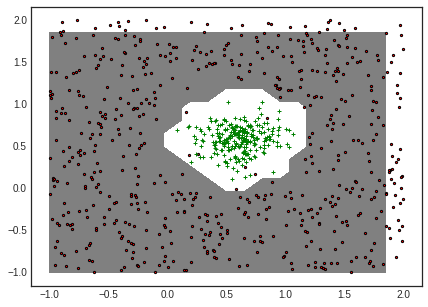

In [26]:

y_conc = models.mod_labels(y_conc,'-1,1')
nn.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=nn.predict)

### Echequier

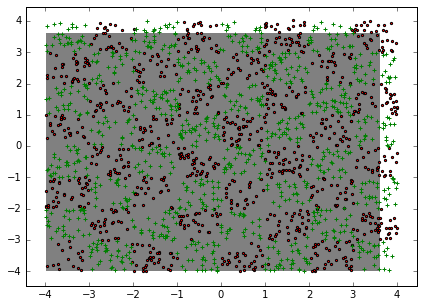

In [14]:
y_ech = models.mod_labels(y_ech,'-1,1')
nn.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=nn.predict)

## Scores: Récapitulatif

In [165]:
dataset=['two_gaussians','four_gaussians','hyperbolic2','concentric2','echequier']
results=[]
for data in dataset:
    d={}
    x,y1=arf.load_csv(data)
    y2=models.mod_labels(y1,mod='0,1')
    
    bayes=models.Bayes()
    d['Naive Bayes']=models.cross_validation(bayes,x,y2,8)
    
    dt=models.DecisionTree()
    dt.maxdepth=5
    d['DecisionTree']=models.cross_validation(dt,x,y2,8)
    
    knn=models.KNN(k=3)
    d['KNN']=models.cross_validation(knn,x,y2,8)
    
    perc=models.Perceptron()
    d['Perceptron']=models.cross_validation(perc,x,y1,8)
    
    nn=models.NN(layers=[2,6,6,1],eps=0.1,max_iter=100000)
    d['Reseau de Neurone']=models.cross_validation(nn,x,y1,8)
    print(data)
    results.append(d)    
    
df=pd.DataFrame(results,index=dataset)
df

two_gaussians
four_gaussians
hyperbolic2
concentric2
echequier


,DecisionTree,KNN,Naive Bayes,Perceptron,Reseau de Neurone
two_gaussians,0.447000,0.981000,0.983000,0.251816,0.982000
four_gaussians,0.470000,0.953000,0.485000,0.262320,0.951000
hyperbolic2,0.666652,1.000000,0.997340,0.056370,1.000000
concentric2,0.702381,0.988095,0.983333,0.080760,0.991667
echequier,0.509500,0.889000,0.495500,0.255532,0.497500


L'arbre de décision et le Perceptron sont dépassés à chaque fois, le KNN a des scores à peu près équivalent aux réseau de neurones sauf pour l'échéquier ou il est presque deux fois plus efficace. Le naive Bayes quand à lui se débrouille bien sur le mélange de deux gaussienne. Sinon il se fait battre soit par le KNN soit par le réseau de neurones.

In [2]:
#df.to_csv('data/scores.csv')
# df_scores=pd.read_csv('data/scores.csv',index_col=0)
#df_scores

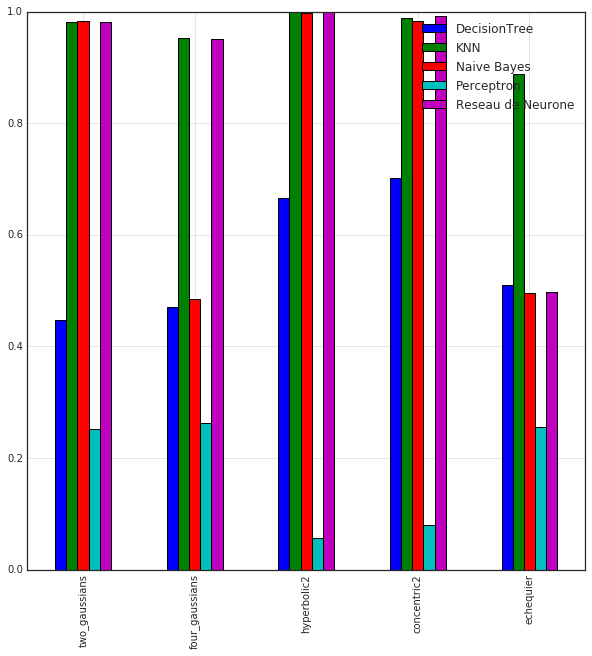

In [169]:
df_scores.plot(kind='bar',title='',figsize=(10,10),grid=True)

## Cas d'usage rapide: données du Titanic


Nous utilisons les données proposés par le site kaggle.com, disponibles à partir du lien suivant:

https://www.kaggle.com/c/titanic/data

Nous avons effectué un pre-processing, où nous avons  les données pour l'analyse suivante. 


### Données

In [6]:
path='data/'
train_df=pd.read_csv(path+'final_train.csv',index_col=False)
test_df=pd.read_csv(path+'final_test.csv')
datax=train_df[['Pclass','Age','Parch','Fare','Embarked','Gender']].values
datay=train_df['Survived'].values
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22,1,0,7.2500,2,1
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,2,0
3,1,1,35,1,0,53.1000,2,0
4,0,3,35,0,0,8.0500,2,1


In [128]:
d={}
x,y1=datax,datay
y2=models.mod_labels(y1,mod='0,1')

bayes=models.Bayes()
d['Naive Bayes']=models.cross_validation(bayes,x,y2,8)

dt=models.DecisionTree()
dt.maxdepth=6
d['DecisionTree']=models.cross_validation(dt,x,y2,8)

knn=models.KNN(k=3)
d['KNN']=models.cross_validation(knn,x,y2,8)

perc=models.Perceptron()
d['Perceptron']=models.cross_validation(perc,x,y1,8)

nn=models.NN(layers=[6,2,2,2,1],eps=0.2,max_iter=100000)
d['Reseau de Neurone']=models.cross_validation(nn,x,y2,8)
    
df_titanic=pd.DataFrame(d,index=['Titanic data'])
df_titanic

,DecisionTree,KNN,Naive Bayes,Perceptron,Reseau de Neurone
Titanic data,0.616152,0.712486,0.765394,0.543782,0.382782


In [14]:
nn=models.NN(layers=[6,50,50,50,1],eps=.2,max_iter=100000)
nn.fit(datax,datay)
nn.predict(datax)
nn.score(datax,datay)

0.38383838383838381

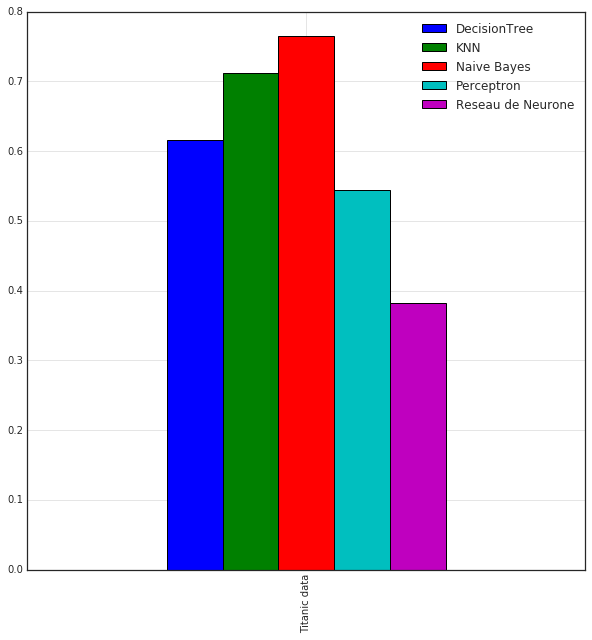

In [170]:
df_titanic.plot(kind='bar',title='',figsize=(10,10),grid=True)

Bizarrement le réseau de neurones renvoie toujours .38 sur cet exemple, pour l'utiliser il faut changer la couche d'entrée à 6 (au lieu de deux). C'est probablement dû à une erreur de conception car quelques soit les hyperparamètres choisis on obtient le même score, nous avons essayé avec 3 couches d'une cinquantaine de neurones, nous avons tenté d'itérer dix fois plus et nous avons bien entendu changé le learning rate (epsilon)

## Conclusion:

En fonction de la distribution des données, certains modèles semblent correspondre plus ou moins. 

### Pour aller plus loin

Il existe de nombreuses méthodes pour améliorer les résultats des obtenus. L'arbre de décision pourrait être transformé en un RandomForest, pour le KNN, nous pourrions utiliser une distance non euclidienne, le perceptron peut-être associé à d'autres pour former un perceptron multi-couches...